## Lendind Club Loan Data (2007-2010)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
file = "//home//vinicius//Data_Science//Notebooks//Data_Files//loan_data.csv"
df1 = pd.read_csv(file)

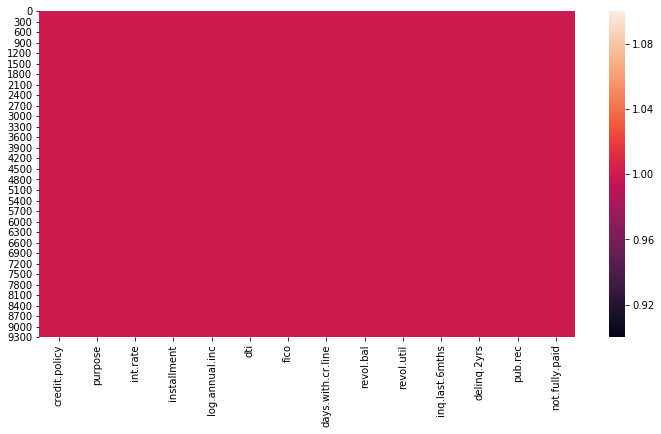

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.notnull())

In [29]:
df1.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

### No null data

In [58]:
df1['credit.policy'].value_counts()
data1 = df1[df1['credit.policy']==1]
data0 = df1[df1['credit.policy']==0]

Text(0.5, 0, 'FICO')

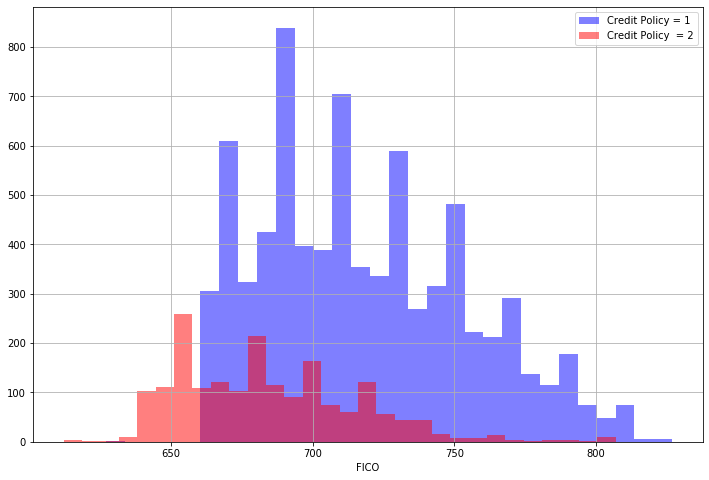

In [59]:
plt.figure(figsize=(12,8))
data1['fico'].hist(alpha=0.5,color='blue',label='Credit Policy = 1', bins=30)
data0['fico'].hist(alpha=0.5, color='red',label='Credit Policy  = 2',bins=30)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('FICO')

In [54]:
df1['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

Text(0.5, 0, 'FICO')

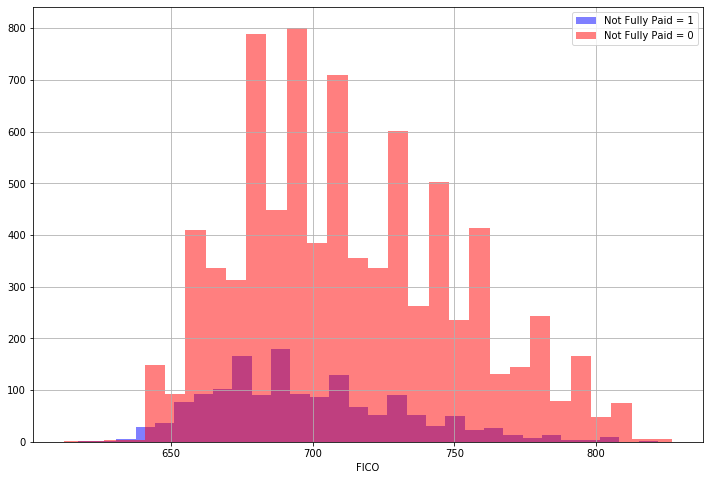

In [60]:
plt.figure(figsize=(12,8))
df1[df1['not.fully.paid']==1]['fico'].hist(alpha=0.5, color='blue', label='Not Fully Paid = 1', bins=30)
df1[df1['not.fully.paid']==0]['fico'].hist(alpha=0.5, color='red', label='Not Fully Paid = 0', bins=30)
plt.legend()
plt.xlabel('FICO')

In [63]:
df1['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

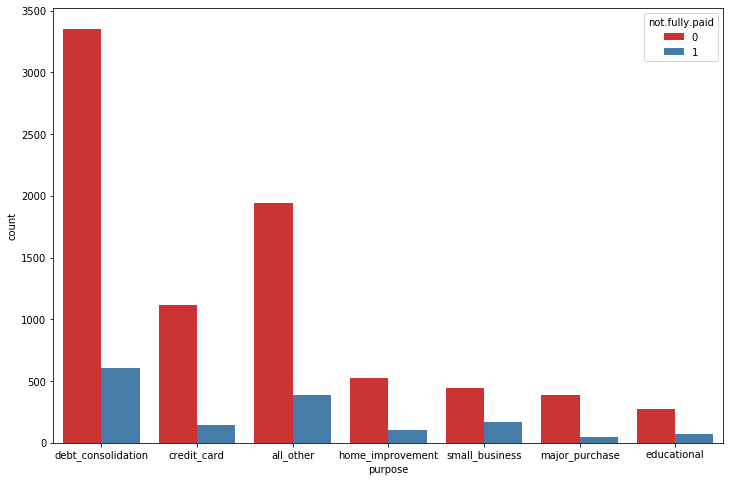

In [81]:
plt.figure(figsize=(12,8))
sns.countplot(x='purpose', hue='not.fully.paid',data=df1,palette='Set1')

In [82]:
df1.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<Figure size 864x576 with 0 Axes>

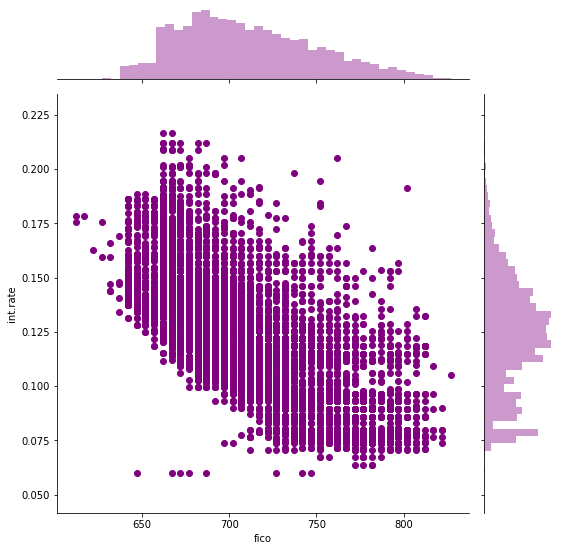

In [92]:
f=plt.figure(figsize=(12,8))
grid=sns.jointplot(x='fico',y='int.rate',data=df1, color='purple')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

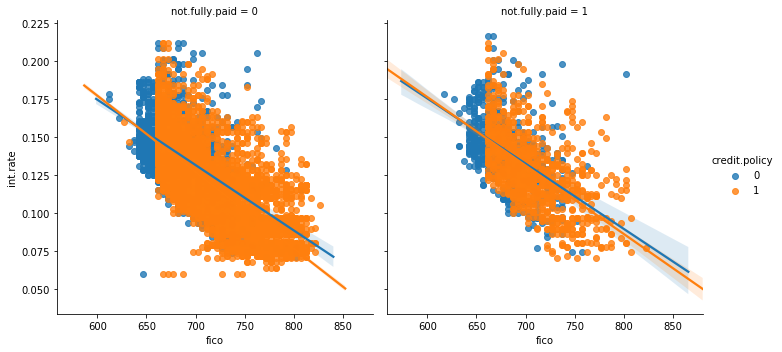

In [99]:
sns.lmplot(x='fico',y='int.rate',data=df1,hue='credit.policy',col='not.fully.paid')

In [100]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [111]:
df2 = pd.get_dummies(df1, columns=['purpose'], drop_first=True)

In [114]:
df2.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [120]:
x = df2.drop('not.fully.paid', axis=1)
y = df2['not.fully.paid']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [121]:
dtree = DecisionTreeClassifier()

In [122]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [123]:
predict = dtree.predict(x_test)

In [124]:
print("Confusion Matrix:\n", confusion_matrix(y_test,predict))
print("\nClassification Report:\n", classification_report(y_test,predict))

Confusion Matrix:
 [[1999  432]
 [ 337  106]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



**Precision ~75%**  
**Use Random Forest now...**

In [131]:
rfc = RandomForestClassifier(n_estimators=800)

In [132]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [133]:
predict = rfc.predict(x_test)

In [134]:
print("Confusion Matrix:\n", confusion_matrix(y_test,predict))
print("\nClassification Report:\n", classification_report(y_test,predict))

Confusion Matrix:
 [[2426    5]
 [ 434    9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.64      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.75      0.51      0.48      2874
weighted avg       0.82      0.85      0.78      2874



**Precision inproved in 0.7, but not so good**